In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from ancestrator import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# $F_{ST}$ Latinos (between populations) & LEA (between regions)

In [5]:
from itertools import product

source_labels = ['1000Genomes']
samplegroup_labels = ['L', 'LE', 'LEA', 'LEAC', 'LEACI']
panel_labels = ["GAL_Completo", "GAL_Affy",
                "CPx1", "CPx10", "CPx100",
                "100_SNPs_from_GAL_Affy", "50_SNPs_from_GAL_Affy",
                "25_SNPs_from_GAL_Affy", "20_SNPs_from_GAL_Affy",
                "15_SNPs_from_GAL_Affy"]

frames = []
combo = product(source_labels, panel_labels, samplegroup_labels)
for source_label, panel_label, samplegroup_label in combo:
    dataset = Dataset(source_label, samplegroup_label, panel_label)
    if dataset.samplegroup.label == 'L':
        df = dataset.fst('population')
        df['level'] = 'population'
    else:
        df = dataset.fst('region')
        df['level'] = 'region'
    df['samplegroup'] = dataset.samplegroup.label
    df['panel'] = panel_label
    frames.append(df)

mean_fst = pd.concat(frames).groupby(['level', 'samplegroup', 'panel']).mean().unstack('panel')['Fst']
sort_panels = ["CPx1", "CPx10", "CPx100", "GAL_Completo", "GAL_Affy",
               "100_SNPs_from_GAL_Affy", "50_SNPs_from_GAL_Affy",
               "25_SNPs_from_GAL_Affy", "20_SNPs_from_GAL_Affy",
               "15_SNPs_from_GAL_Affy"]
mean_fst = mean_fst[sort_panels]
mean_fst.columns = [Panel(panel_label).name for panel_label in mean_fst.columns]
mean_fst

CPx1 · 438 SNPs  CPx10 · 4,424 SNPs  \
level      samplegroup                                        
population L                   0.018299            0.018825   
region     LE                  0.017955            0.018871   
           LEA                 0.068920            0.066504   
           LEAC                0.079672            0.075545   
           LEACI               0.074791            0.071325   

                        CPx100 · 43,144 SNPs  GAL_Completo · 445 SNPs  \
level      samplegroup                                                  
population L                        0.018854                 0.104449   
region     LE                       0.018389                 0.121449   
           LEA                      0.065758                 0.348847   
           LEAC                     0.074351                 0.315325   
           LEACI                    0.070097                 0.290450   

                        GAL_Affy · 179 SNPs  GAL_Affy · SubPanel_100  \
level      samplegroup                                                 
population L                       0.099087                 0.092496   
region     LE                      0.110167                 0.066356   
           LEA                     0.386319                 0.451967   
           LEAC                    0.347403                 0.410760   
           LEACI                   0.322094                 0.382093   

                        GAL_Affy · SubPanel_50  GAL_Affy · SubPanel_25  \
level      samplegroup                                                   
population L                          0.071592                0.088894   
region     LE                         0.053685                0.075780   
           LEA                        0.532849                0.518940   
           LEAC                       0.483638                0.471756   
           LEACI                      0.450315                0.439977   

                        GAL_Affy · SubPanel_20  GAL_Affy · SubPanel_15  
level      samplegroup                                                  
population L                          0.093338                0.076157  
region     LE                         0.082116                0.066855  
           LEA                        0.507876                0.546644  
           LEAC                       0.463890                0.479910  
           LEACI                      0.434481                0.447036

In [27]:
mean_fst.loc['region']

,CPx1 · 438 SNPs,"CPx10 · 4,424 SNPs","CPx100 · 43,144 SNPs",GAL_Completo · 445 SNPs,GAL_Affy · 179 SNPs,GAL_Affy · SubPanel_100,GAL_Affy · SubPanel_50,GAL_Affy · SubPanel_25,GAL_Affy · SubPanel_20,GAL_Affy · SubPanel_15
samplegroup,,,,,,,,,,
LE,0.017955,0.018871,0.018389,0.121449,0.110167,0.066356,0.053685,0.075780,0.082116,0.066855
LEA,0.068920,0.066504,0.065758,0.348847,0.386319,0.451967,0.532849,0.518940,0.507876,0.546644
LEAC,0.079672,0.075545,0.074351,0.315325,0.347403,0.410760,0.483638,0.471756,0.463890,0.479910
LEACI,0.074791,0.071325,0.070097,0.290450,0.322094,0.382093,0.450315,0.439977,0.434481,0.447036


Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__region


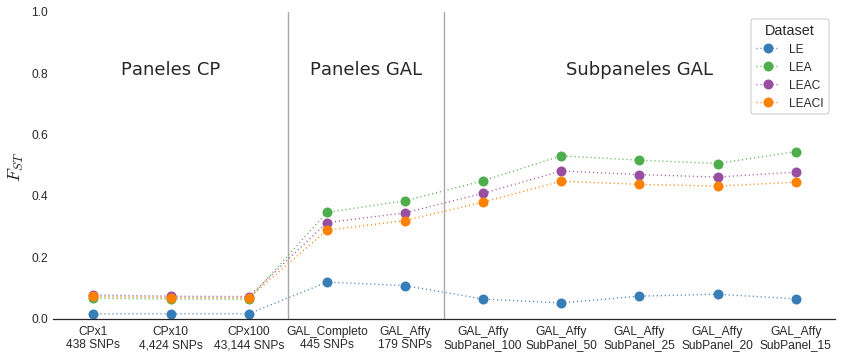

Fst promedio (todos los datasets)
/home/juan/tesina/charts/panel_analyses/fst_barchart__population


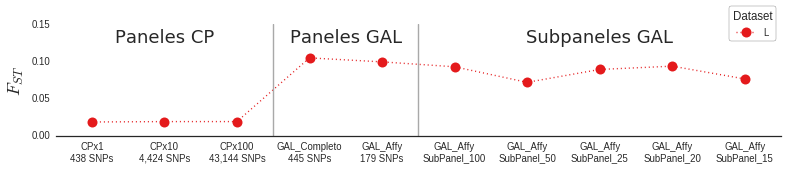

In [30]:
import numpy as np
from os.path import expanduser, join


fdir = expanduser("~/tesina/charts/panel_analyses")

sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns.set_style("white")

for level in ['region', 'population']:
    df = mean_fst.loc[level].copy()

    if level == 'population':
        color = sns.color_palette("Set1", 1)[0]
        sns.set_context("paper", font_scale=1.2)
        figsize = (13, 2)
    else:  
        color = sns.color_palette("Set1", 5)[1:]
        figsize = (14, 5.5)
        
    ax = df.T.plot(figsize=figsize, rot=0, color=color, linestyle="dotted",
                   marker="o", markersize=10) #, width=0.8) # kind="bar", 
    ax.set_ylabel("$F_{ST}$", fontsize=18, fontweight="bold")
    ax.legend(fancybox=True, loc="best", bbox_to_anchor=(1.01, .75),
              title="Datasets")

    # Annotate groups of panels
    ax.axvline(2.5, color="darkgray")
    ax.axvline(4.5, color="darkgray")
    text_yloc = 0.8 if level == 'region' else 0.125
    texts = [(1, text_yloc, "Paneles CP"),
             (3.5, text_yloc, "Paneles GAL"),
             (7, text_yloc, "Subpaneles GAL")]
    for params in texts:
        ax.text(*params, fontsize=18, horizontalalignment="center",
                family="monospace", fontname="Courier")

    if level == 'region':
        ax.set_ylim([0, 1])
        ygrid_points = np.linspace(0, 1, 6)
        ax.set_yticks(ygrid_points)
    else:
        ax.set_ylim([0, 0.15])
        ygrid_points = np.linspace(0, 0.15, 4)
        ax.set_yticks(ygrid_points)
        
    ax.set_xlim([-0.5, 9.5])
    ax.set_xticks(np.linspace(0, 9, 10))
    
    xticklabels = [l.get_text().replace(' · ', '\n') for l in ax.get_xticklabels()]
    ax.set_xticklabels(xticklabels, rotation=0)
    sns.despine(left=True)
    ax.xaxis.grid(False)

    handles, labels = ax.get_legend_handles_labels()
    if level == 'region':
        ax.legend(handles, labels, frameon=True, fancybox=True, title='Dataset')
    else:
        ax.legend(handles, labels, frameon=True, fancybox=True, title='Dataset',
                  bbox_to_anchor=(1, 1.2))

    caption = "Fst promedio (todos los datasets)"
    filepath = join(fdir, "fst_barchart__{}".format(level))
    plt.savefig(filepath, bbox_inches="tight")
    print(caption)
    print(filepath)
    plt.show()

In [55]:
df = mean_fst.loc['population'].T.applymap(lambda x: round(x, 3))
print(df)
print()
print(df.to_latex())

dataset                      L
CPx1 · 438 SNPs          0.018
CPx10 · 4,424 SNPs       0.019
CPx100 · 43,144 SNPs     0.019
GAL_Completo · 445 SNPs  0.104
GAL_Affy · 179 SNPs      0.099
GAL_Affy · SubPanel_100  0.092
GAL_Affy · SubPanel_50   0.072
GAL_Affy · SubPanel_25   0.089
GAL_Affy · SubPanel_20   0.093
GAL_Affy · SubPanel_15   0.076

\begin{tabular}{lr}
\toprule
dataset &      L \\
\midrule
CPx1 · 438 SNPs         &  0.018 \\
CPx10 · 4,424 SNPs      &  0.019 \\
CPx100 · 43,144 SNPs    &  0.019 \\
GAL\_Completo · 445 SNPs &  0.104 \\
GAL\_Affy · 179 SNPs     &  0.099 \\
GAL\_Affy · SubPanel\_100 &  0.092 \\
GAL\_Affy · SubPanel\_50  &  0.072 \\
GAL\_Affy · SubPanel\_25  &  0.089 \\
GAL\_Affy · SubPanel\_20  &  0.093 \\
GAL\_Affy · SubPanel\_15  &  0.076 \\
\bottomrule
\end{tabular}

